# Week 1 of Cellula Internship: EDA (Group Work)

In [1]:
# import nessessory paskages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from scipy.stats import pointbiserialr

<img src="./data_dict.jpeg" alt="Data Dictionary">

## Data fetching and data preparation for analysis

In [2]:
# reading the data

df = pd.read_csv("./first_inten_project.csv")
df.columns

Index(['Booking_ID', 'number of adults', 'number of children',
       'number of weekend nights', 'number of week nights', 'type of meal',
       'car parking space', 'room type', 'lead time', 'market segment type',
       'repeated', 'P-C', 'P-not-C', 'average price ', 'special requests',
       'date of reservation', 'booking status'],
      dtype='object')

There are 17 columns, **average price** column seems to have leading spaces so lets strip them and show a sample of data values:

In [3]:
df.columns = df.columns.map(str.strip)
df.sample(5)

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
17889,INN17890,2,0,0,5,Meal Plan 1,0,Room_Type 1,140,Offline,0,0,0,70.0,0,12/29/2017,Not_Canceled
7749,INN07750,1,0,0,3,Meal Plan 1,0,Room_Type 1,7,Offline,0,0,0,112.0,0,5/5/2018,Not_Canceled
34033,INN34034,2,0,2,1,Meal Plan 1,0,Room_Type 4,142,Online,0,0,0,114.3,0,5/22/2018,Not_Canceled
26740,INN26741,2,0,0,3,Meal Plan 1,0,Room_Type 1,59,Offline,0,0,0,60.0,0,2/4/2018,Not_Canceled
22426,INN22427,3,0,2,1,Meal Plan 2,0,Room_Type 1,103,Offline,0,0,0,138.5,0,7/18/2017,Not_Canceled


now, let's examine the structure of data using `.info` method:

In [4]:
# showing a description of the data structure

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

This shows the structure of the dataset. It has a *shape* of (17, 36285) with-out any missing values. <br>
11 of them are quantitative variables (including binary ones) and rest are qualitative variables (including the identifire and date columns).

Now, let's apply some filtering on the features:

In [5]:
# filtering attributes based on their values

numerical_atts = ["number of adults", "number of children", "number of weekend nights", 
                  "number of week nights", "lead time", "P-C", "P-not-C", "average price", 
                  "special requests"]

categorical_atts = ["car parking space", "repeated", "type of meal", "room type",
                    "market segment type", "booking status"]

date_atts = ["date of reservation"]

Well, the dataframe contains 2-binary columns treated as numeric columns and a date column which holds the values as a string data type.

In the next cell I'll do this required transformation on their data types:

In [6]:
# data transformation

df["repeated"] = df["repeated"].astype("category")
df["car parking space"] = df["car parking space"].astype("category")

df["date of reservation"] = pd.to_datetime(df["date of reservation"], format='mixed', errors='coerce')

Now, let's checking for missing values after doing these transformations and remove them from the dataset:

In [7]:
df[["repeated", "car parking space", "date of reservation"]].isna().sum()

repeated                0
car parking space       0
date of reservation    37
dtype: int64

In [8]:
df.dropna(inplace=True)
df["date of reservation"].isna().sum()

0

Finally, let's check for duplicated rows:

In [9]:
df.duplicated().sum()

0

In [10]:
df.drop(["P-C", "P-not-C"], axis="columns").to_csv("cleaned.csv", index=None)

Our data is now ready for analysis.

## Descriptive statistical data analysis

Now, lets apply some descriptive statistical analysis on them:

In [11]:
# apply some descriptive statistics on the quantitative variables

df[numerical_atts].describe().T

,count,mean,std,min,25%,50%,75%,max
number of adults,36248.0,1.845178,0.518671,0.0,2.0,2.00,2.0,4.0
number of children,36248.0,0.105302,0.402597,0.0,0.0,0.00,0.0,10.0
number of weekend nights,36248.0,0.810445,0.870938,0.0,0.0,1.00,2.0,7.0
number of week nights,36248.0,2.204508,1.410825,0.0,1.0,2.00,3.0,17.0
lead time,36248.0,85.282360,85.961536,0.0,17.0,57.00,126.0,443.0
P-C,36248.0,0.023339,0.368432,0.0,0.0,0.00,0.0,13.0
P-not-C,36248.0,0.152919,1.753126,0.0,0.0,0.00,0.0,58.0
average price,36248.0,103.435350,35.081308,0.0,80.3,99.45,120.0,540.0
special requests,36248.0,0.620034,0.786429,0.0,0.0,0.00,1.0,5.0


Well, that reveals a lot!

First of all, the **number of adults** are ranging from 0 to 4 adults with a majority of 2 adults in each booking observation. For the **number of childrens**, the maximum number of childrens was 10 childrens and almost of bookings were limited to adults (no childrens).

Weekend stays typically range from 0 to 2 nights, with some extending up to 7 nights and the same for **number of week nights**, it stays range from 0 to 3 with some exceptions going up to 17 nights.

Most bookings, more than half, do not include **special requests**, with some having up to 5 requests.

The **average prices** are normally distributed and they have almost symmetric belled shape, with prices mean of 103.

The median **lead time** is approximately 57 days with a high variability as indicated by a standard deviation of 85.94 days. The values are ranging from 0, indicating some bookings are made for immediate arrivalm and 443 days, indicating some bookings made in advance.

**Warning**<br>
For probability of cancellation and not cancellation (**P-C and P-not-C**) values are inconsistent (e.g. the summation of the corresponding values should be equal to 100% which is not hold) and for this purpose they will be discard from this analysis.

In [12]:
# apply some descriptive statistics on the qualitative variables

for cat_att in categorical_atts:
    relative_freq_dist_table = df[cat_att].value_counts() / df.shape[0]
    relative_freq_dist_table.name = f"Relative frequency distribution table of `{cat_att}` column"
    print(relative_freq_dist_table, end="\n\n")

car parking space
0    0.969074
1    0.030926
Name: Relative frequency distribution table of `car parking space` column, dtype: float64

repeated
0    0.974454
1    0.025546
Name: Relative frequency distribution table of `repeated` column, dtype: float64

type of meal
Meal Plan 1     0.767187
Not Selected    0.141553
Meal Plan 2     0.091122
Meal Plan 3     0.000138
Name: Relative frequency distribution table of `type of meal` column, dtype: float64

room type
Room_Type 1    0.775574
Room_Type 4    0.166933
Room_Type 6    0.026595
Room_Type 2    0.019091
Room_Type 5    0.007256
Room_Type 7    0.004359
Room_Type 3    0.000193
Name: Relative frequency distribution table of `room type` column, dtype: float64

market segment type
Online           0.640063
Offline          0.290250
Corporate        0.055479
Complementary    0.010759
Aviation         0.003448
Name: Relative frequency distribution table of `market segment type` column, dtype: float64

booking status
Not_Canceled    0.672203
C

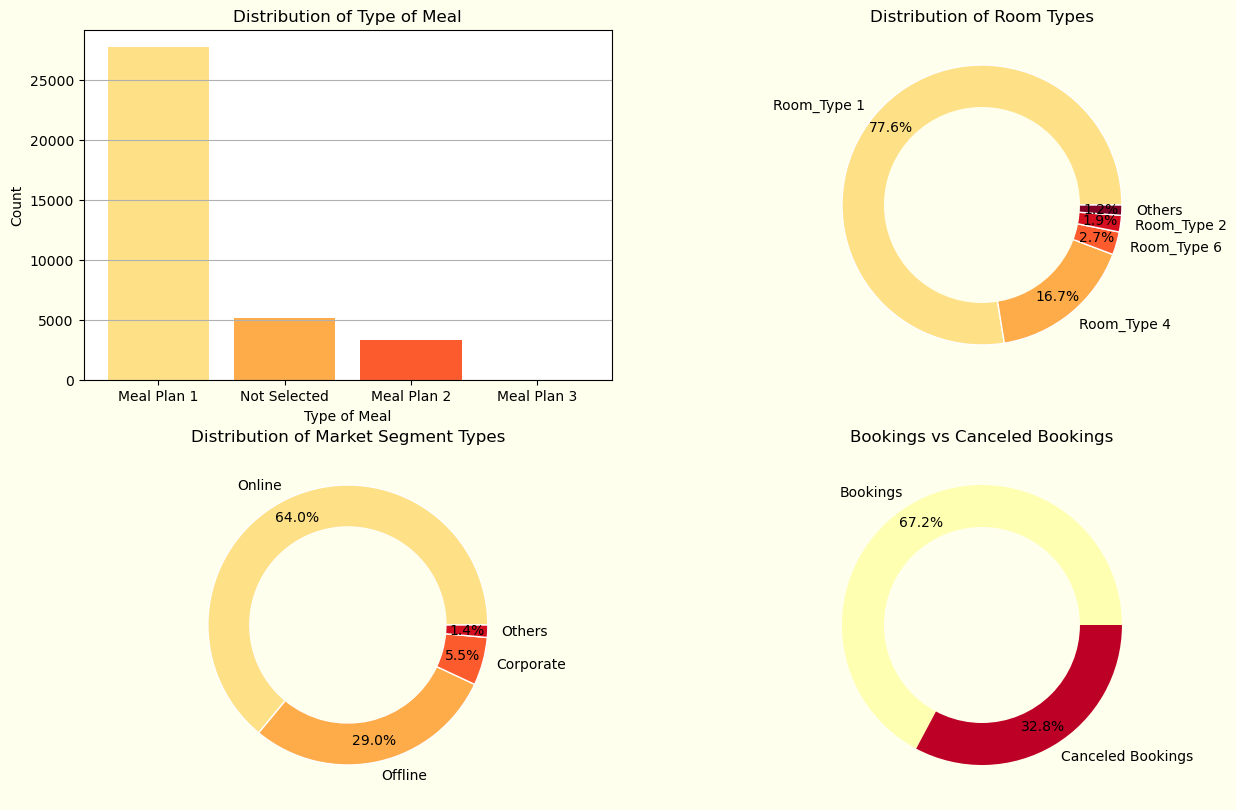

In [16]:
df['year_month'] = df['date of reservation'].dt.to_period('M')

monthly_counts = df.groupby('year_month')[['number of adults', 'number of children']].sum().reset_index()
meal_counts = df['type of meal'].value_counts()
room_counts = df['room type'].replace({'Room_Type 3': 'Others', 'Room_Type 5': 'Others', 'Room_Type 7': 'Others'}).value_counts()
segment_counts = df['market segment type'].replace({'Complementary': 'Others', 'Aviation': 'Others'}).value_counts()

cmap = plt.cm.YlOrRd
colors = cmap([0.2, 0.4, 0.6, 0.8, 1.0])


fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
fig.patch.set_facecolor("#ffffee")


bars = ax1.bar(meal_counts.index, meal_counts, color=colors)
ax1.set_title("Distribution of Type of Meal")
ax1.set_ylabel("Count")
ax1.set_xlabel("Type of Meal")
ax1.grid(axis='y')


wedges, texts, autotexts = ax2.pie(room_counts, labels=room_counts.index, colors=colors, autopct="%1.1f%%", pctdistance=0.85, wedgeprops=dict(width=0.6, edgecolor='white'))
ax2.set_title("Distribution of Room Types")
circle = plt.Circle((0, 0), radius=0.7, fc="#ffffee")
ax2.add_artist(circle)


wedges, texts, autotexts = ax3.pie(segment_counts, labels=segment_counts.index, colors=colors, autopct="%1.1f%%", pctdistance=0.85, wedgeprops=dict(width=0.3, edgecolor='white'))
ax3.set_title("Distribution of Market Segment Types")
circle = plt.Circle((0, 0), radius=0.7, fc="#ffffee")
ax3.add_artist(circle)


number_of_bookings_over_time = df[df["booking status"] == "Not_Canceled"].groupby(df["date of reservation"].dt.to_period('M')).size().reset_index(name='# of Bookings')
number_of_canceled_bookings_over_time = df[df["booking status"] == "Canceled"].groupby(df["date of reservation"].dt.to_period('M')).size().reset_index(name='# of canceld Bookings')

circle = plt.Circle((0, 0), radius=0.7, fc="#ffffee")
plt.pie([number_of_bookings_over_time["# of Bookings"].sum(), number_of_canceled_bookings_over_time["# of canceld Bookings"].sum()],
       labels=["Bookings", "Canceled Bookings"], colors=["#ffffb2", "#bd0026"], autopct="%1.1f%%", pctdistance=0.85
    )

plt.title("Bookings vs Canceled Bookings")
plt.gca().add_artist(circle)
plt.show()

fig.tight_layout()
plt.show()

In [17]:
df[categorical_atts].describe().T

,count,unique,top,freq
car parking space,36248,2,0,35127
repeated,36248,2,0,35322
type of meal,36248,4,Meal Plan 1,27809
room type,36248,7,Room_Type 1,28113
market segment type,36248,5,Online,23201
booking status,36248,2,Not_Canceled,24366


There are a lot here! 

A fair percentage of bookings, about 32%, were canceled which require some more investigation.

For both, **car parking space** and **repeated**, a very small proportion of 3% were found with a space for car parking and they are not repeated bookings.

Also, there are 3 primarily **meal plans**, plan 1, 2, and 3. There is an option for non selected plan. The majority of 77% bookings were with a plan 1. 14% of them did not select any meal plan. The last 9% were found with plan 2 and a very small percentage, 0.01, of bookings were booked with plan meal 3.

For **type of rooms** there are 7 types. The most popular room type booked was rooms of type 1, with a percentage of 77% and 17% for rooms of type 4. The last 6% was distributed among the room types.

Well, the majority of bookings, 64%, were made through online channels, making it the most popular choice, likely due to their accessibility. A significant portion of bookings, 29%, were made offline. Corporate bookings account for 5.56% of the total. This segment consists of business travelers whose stays are often arranged through company accounts or corporate travel agencies. The last proportion segment, about 1.5%, were for complementary and aviation bookings.

## Data viz 

### Bookings Status Over Time

Let's examine the number of bookings over time. This can help us identify trends and seasonality in our bookings data, let's check the booking status distribution at first:

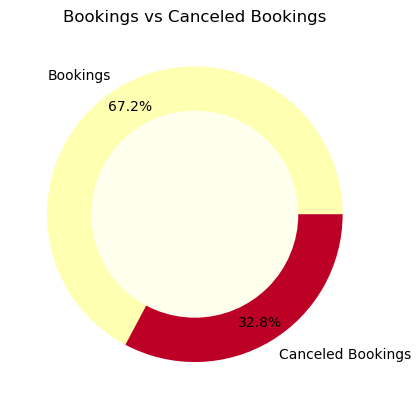

In [18]:
circle = plt.Circle((0, 0), radius=0.7, fc="#ffffee")
plt.pie([number_of_bookings_over_time["# of Bookings"].sum(), number_of_canceled_bookings_over_time["# of canceld Bookings"].sum()],
       labels=["Bookings", "Canceled Bookings"], colors=["#ffffb2", "#bd0026"], autopct="%1.1f%%", pctdistance=0.85
    )

plt.title("Bookings vs Canceled Bookings")
plt.gca().add_artist(circle)
plt.show()

Well, about 33% of booking are canceled, in fact it is not a small ratio! so, let's dive deeply in our analysis:

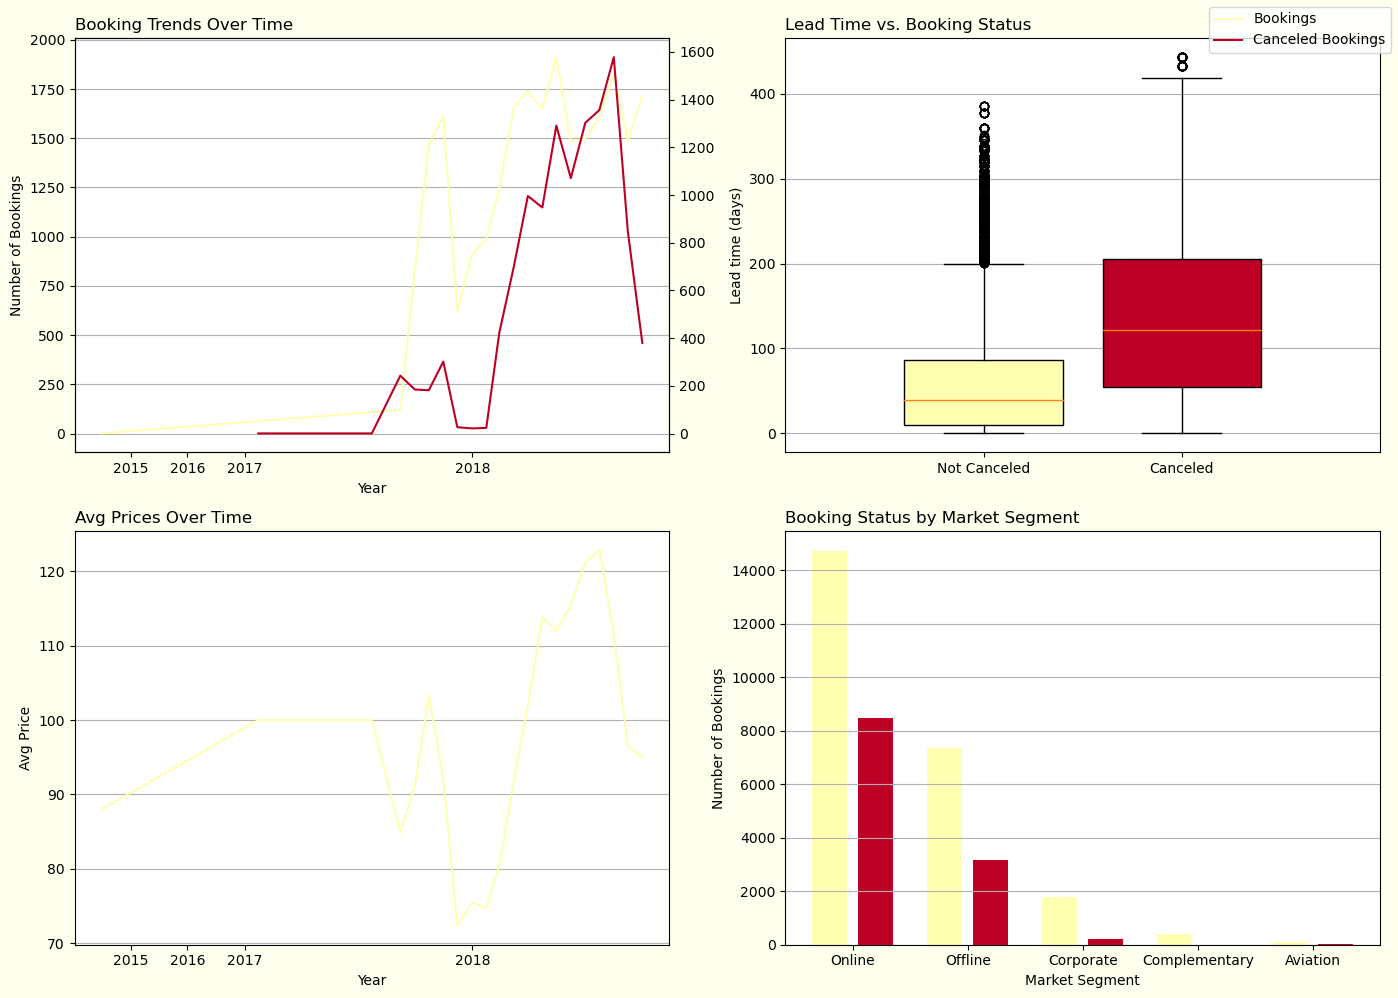

In [19]:
avg_prices_over_time = df.groupby(by=df["date of reservation"].dt.to_period('M'))["average price"].mean().reset_index(name="Avg Price")
booking_status_based_on_market_segmentation = df.groupby(by=["market segment type", "booking status"]).size().sort_values(ascending=False)

mtseg_combined = []

for mtseg in df["market segment type"].unique():
    mtseg_combined.append(
        (
            (booking_status_based_on_market_segmentation[mtseg].get("Not_Canceled", 0)),
            (booking_status_based_on_market_segmentation[mtseg].get("Canceled", 0))
        )
    )
    
mtseg_combined.sort(reverse=True)
mtseg_combined = [_[i] for _ in mtseg_combined for i in range(0, 2)]

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
fig.patch.set_facecolor("#ffffee")
fig.set_figheight(10)
fig.set_figwidth(14)

ax1.plot_date(number_of_bookings_over_time["date of reservation"], number_of_bookings_over_time["# of Bookings"], 
              '-', color="#ffffb2", label="Bookings")
ax1.set_xticks([16801, 16922, 17045, 17532])
ax1.set_xticklabels([2015, 2016, 2017, 2018])
ax1.set_title("Booking Trends Over Time", loc="left")
ax1.grid(axis='y')

ax12 = ax1.twinx()
ax12.plot_date(number_of_canceled_bookings_over_time["date of reservation"], 
              number_of_canceled_bookings_over_time["# of canceld Bookings"], 
              '-', color="#bd0026", label="Canceled Bookings")

handle1, label1 = ax1.get_legend_handles_labels()
handle2, label2 = ax12.get_legend_handles_labels()

ax1.set_ylabel("Number of Bookings")
ax1.set_xlabel("Year")

ax3.plot_date(avg_prices_over_time["date of reservation"], avg_prices_over_time["Avg Price"], '-', color="#ffffb2")
ax3.set_xticks([16801, 16922, 17045, 17532])
ax3.set_xticklabels([2015, 2016, 2017, 2018])
ax3.grid(axis='y')
ax3.set_title("Avg Prices Over Time", loc="left")
ax3.set_xlabel("Year")
ax3.set_ylabel("Avg Price")

ax2.boxplot(df["lead time"][df["booking status"] == "Not_Canceled"], positions=[0], widths=0.4, patch_artist=True,
            boxprops={"facecolor": "#ffffb2"}
           )
ax2.boxplot(
    df["lead time"][df["booking status"] == "Canceled"], positions=[0.5], widths=0.4, patch_artist=True,
    boxprops={"facecolor": "#bd0026"}
)
ax2.set_xticks([0, 0.5])
ax2.set_xticklabels(["Not Canceled", "Canceled"])
ax2.grid(axis='y')
ax2.set_title("Lead Time vs. Booking Status", loc="left")
ax2.set_ylabel("Lead time (days)")

ax4.bar([0, 0.4, 1, 1.4, 2, 2.4, 3, 3.4, 4, 4.4 ], mtseg_combined, width=0.3, color=["#ffffb2", "#bd0026"])
ax4.set_xticks(np.arange(0.2, 5.2))
ax4.set_xticklabels(booking_status_based_on_market_segmentation.index.get_level_values("market segment type").unique().to_list())
ax4.set_title("Booking Status by Market Segment", loc="left")
ax4.set_xlabel("Market Segment")
ax4.set_ylabel("Number of Bookings")
ax4.grid(axis='y')

fig.tight_layout()
fig.legend(handle1 + handle2, label1 + label2, loc="upper right")
plt.show()

As shown here, there was a relative increasing in the number of booking, from 2015 until mid-2017. Then, a significant increasing in the number of booking until the end of November 2017 which is with sharp decline in the number of bookings until the beginning of 2018. From 2015 there was a relativly stable number of canceled booking until 2018, which get also increased as the number of bookings were increased in general.

However, the number of bookings is increasing year over year, essipcially at the begining and ending of each year (in winter season) may due to winter sports such as skiing, snowboarding, ice skating, and etc, or dur to winter holidays  such as christmas, new year's, and various cultural celebrations which allows people to visit family and friends, or may due to off-peak travel for certain destinations, making travel more affordable with lower prices. And this may interpret the sharp decreasing in the number canceled bookings at the december of each year after decreasing in the average booking price after a continuous increasing!

In fact, there is a strong positive relationship about 0.79 between the number of canceled bookings and average prices, as the average prices increases the number of booking cancelation is also increases.

In the boxplot above, it is clearly shown that the impact of the duration time on the likelihood of booking to be canceled, since the boxplot that representing the canceled bookings has a bigger range and the data points are spread in that range.

Finally, the majority of bookings are done and canceled online platforms, due to their accessibility and its usability than offline or traditional methods.

In [20]:
corr_coeff = np.corrcoef([0] + list(number_of_canceled_bookings_over_time['# of canceld Bookings']), avg_prices_over_time['Avg Price'])
print(f"correlation coefficient between number of canceled bookings and the average booking price: {corr_coeff[0, 1]:.2f}")

correlation coefficient between number of canceled bookings and the average booking price: 0.79


### Average Price Analysis

There are multiple factors that can effect the booking price, including length of stay, type of meal, the special requests and more.<br>

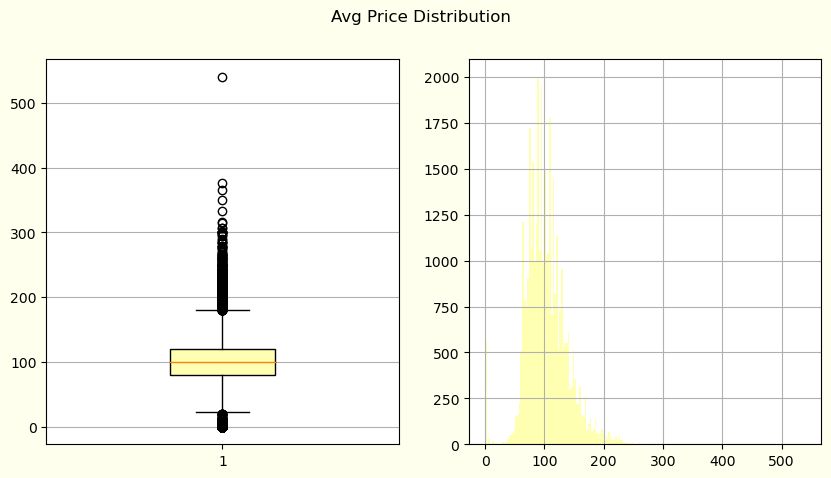

In [21]:
fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.set_facecolor("#ffffee")
fig.set_figheight(5)
fig.set_figwidth(10)

ax1.boxplot(
    df["average price"],
    widths=0.3,
    patch_artist=True,
    boxprops={"facecolor": "#ffffb2"}
)

ax2.hist(
    df["average price"],
    bins=int(np.sqrt(df.shape[0])),
    color="#ffffb2"
)

ax2.grid()
ax1.grid(axis='y')
fig.suptitle("Avg Price Distribution")
plt.show()

The average prices are normally distributed from 30 to 180 with relatively small outliers with prices up to 500, which may due to request some special utilization such as requesting for space car parking, highly cost meal plan or any something else which will explained in the next cell:

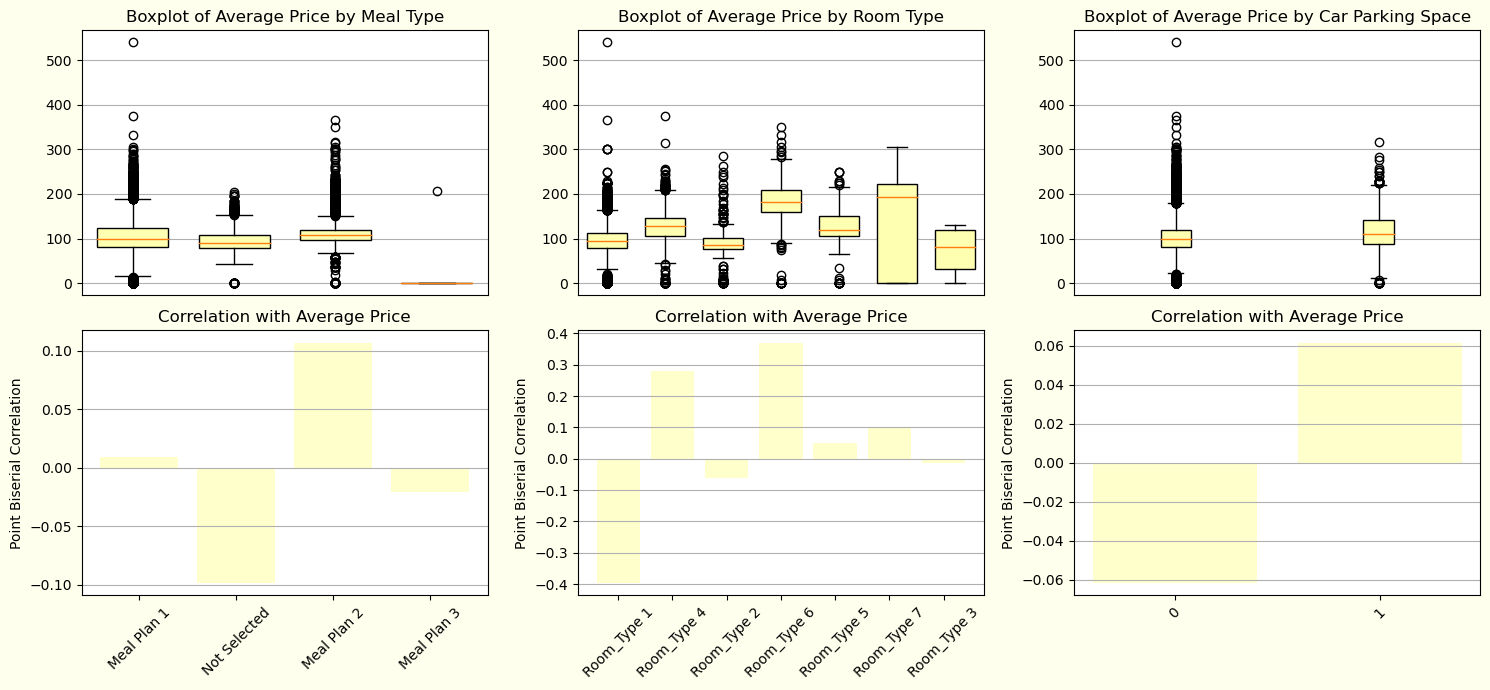

In [22]:
meal_types = df["type of meal"].unique()
correlations_meal = [pointbiserialr((df["type of meal"] == meal).astype(int), df["average price"])[0] for meal in meal_types]

room_types = df["room type"].unique()
correlations_room = [pointbiserialr((df["room type"] == room).astype(int), df["average price"])[0] for room in room_types]

correlation_car_parking = [pointbiserialr((df['car parking space'] == parking_value).astype(int), df['average price'])[0] for parking_value in df['car parking space'].unique()]

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3, figsize=(15, 7), facecolor="#ffffee")

norm = plt.Normalize(df["average price"].mean().min(), df["average price"].mean().max())
cmap = plt.cm.YlOrRd

for i, meal_plan in enumerate(meal_types):
    ax1.boxplot(
        df["average price"][df["type of meal"] == meal_plan], 
        positions=[i], labels=[meal_plan], widths=0.7,
        patch_artist=True,
        boxprops={"facecolor": "#ffffb2"}
    )

ax1.set_xticks(range(len(meal_types)))
ax1.set_xticklabels(meal_types)
ax1.grid(axis='y')
ax1.set_title('Boxplot of Average Price by Meal Type')
ax1.axes.xaxis.set_visible(False)

ax4.bar(range(len(correlations_meal)), correlations_meal, color=cmap(norm(correlations_meal)))
ax4.set_xticks(range(len(meal_types)))
ax4.set_xticklabels(meal_types, rotation=45)
ax4.set_ylabel('Point Biserial Correlation')
ax4.set_title('Correlation with Average Price')

for i, room_type in enumerate(room_types):
    ax2.boxplot(
        df["average price"][df["room type"] == room_type], 
        positions=[i], widths=0.7,
        patch_artist=True,
        boxprops={"facecolor": "#ffffb2"}
    )

ax2.set_xticks(range(len(room_types)))
ax2.set_xticklabels(room_types, rotation=45)
ax2.grid(axis='y')
ax2.set_title('Boxplot of Average Price by Room Type')
ax2.axes.xaxis.set_visible(False)

ax5.bar(range(len(correlations_room)), correlations_room, color=cmap(norm(correlations_room)))
ax5.set_xticks(range(len(room_types)))
ax5.set_xticklabels(room_types, rotation=45)
ax5.set_ylabel('Point Biserial Correlation')
ax5.set_title('Correlation with Average Price')

car_parking_data = [df[df['car parking space'] == value]['average price'] for value in df['car parking space'].unique()]
ax3.boxplot(car_parking_data, patch_artist=True, boxprops={"facecolor": "#ffffb2"})
ax3.set_xticklabels(df['car parking space'].unique(), rotation=45)
ax3.grid(axis='y')
ax3.set_title('Boxplot of Average Price by Car Parking Space')
ax3.axes.xaxis.set_visible(False)

ax6.bar(range(len(df['car parking space'].unique())), correlation_car_parking, color=cmap(norm(correlation_car_parking)))
ax6.set_xticks(range(len(df['car parking space'].unique())))
ax6.set_xticklabels(df['car parking space'].unique(), rotation=45)
ax6.set_ylabel('Point Biserial Correlation')
ax6.set_title('Correlation with Average Price')

ax4.grid(axis='y')
ax5.grid(axis='y')
ax6.grid(axis='y')

plt.tight_layout()
plt.show()

As we seen before, there was a disruption in average booking prices from mid-2017 to the end of 2018. So, let's turn our focus in this interval.

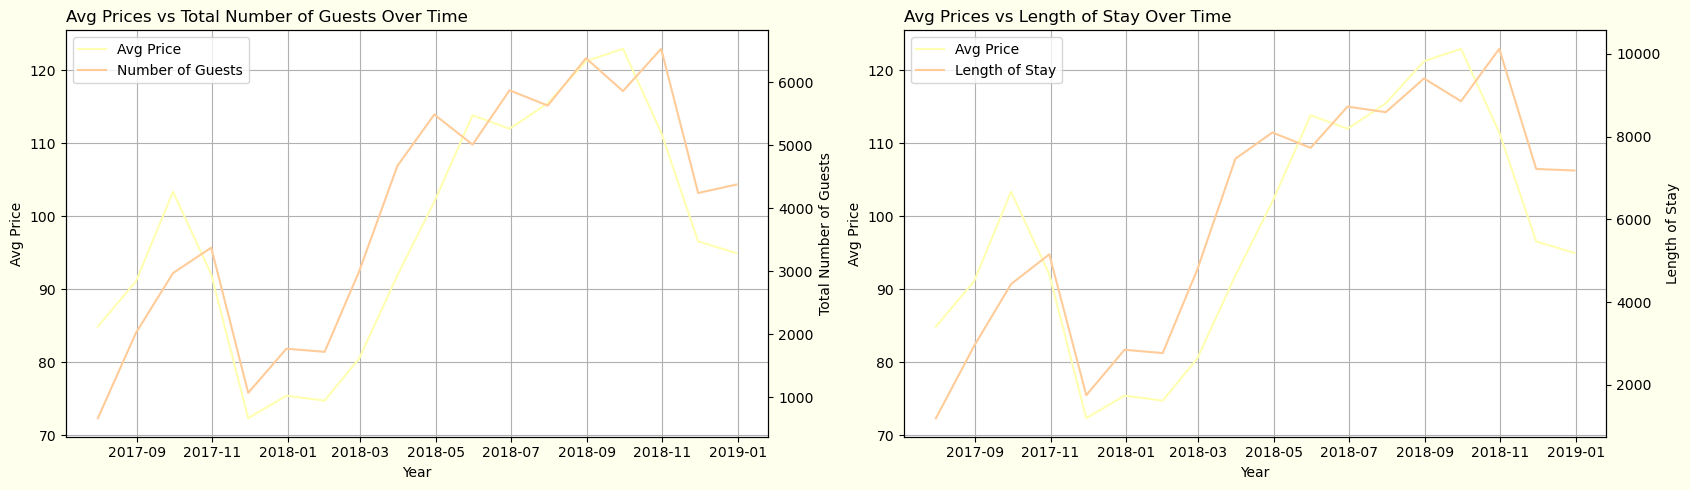

In [23]:
df_mid17_18 = (df[df["date of reservation"].between(np.datetime64('2017-06-01'), np.datetime64('2019-01-01'))]).copy()
df_mid17_18["Guests"] = df_mid17_18["number of adults"] + df_mid17_18["number of children"]
df_mid17_18["Length of Stay"] = df_mid17_18["number of week nights"] + df_mid17_18["number of weekend nights"]
df_mid17_18_by_month = df_mid17_18.groupby(by=df_mid17_18["date of reservation"].dt.to_period('M'))
df_mid17_18_avg_prices_over_time = df_mid17_18_by_month["average price"].mean().reset_index(name="Avg Price")
df_mid17_18_number_of_guests_over_time = df_mid17_18_by_month["Guests"].sum().reset_index(name="Total Number of Guests")
df_mid17_18_stay_period_avg_over_time = df_mid17_18_by_month["Length of Stay"].sum().reset_index(name="Staying Period")

fig, (ax1, ax2) = plt.subplots(ncols=2)

fig.set_figheight(5)
fig.set_figwidth(17)
fig.set_facecolor("#ffffee")

ax1.plot_date(
    df_mid17_18_avg_prices_over_time["date of reservation"], 
    df_mid17_18_avg_prices_over_time["Avg Price"], '-', 
    color="#ffffb2", label="Avg Price"
)

handel1, label1 = ax1.get_legend_handles_labels()

ax12 = ax1.twinx()
ax12.set_ylabel("Total Number of Guests")

ax12.plot_date(
    df_mid17_18_number_of_guests_over_time["date of reservation"], 
    df_mid17_18_number_of_guests_over_time["Total Number of Guests"], 
    '-', color="#ffcc99", label="Number of Guests"
)

handel2, label2 = ax12.get_legend_handles_labels()

ax1.grid()
ax1.set_title("Avg Prices vs Total Number of Guests Over Time", loc="left")
ax1.set_xlabel("Year")
ax1.set_ylabel("Avg Price")
ax1.legend(handel1 + handel2, label1 + label2)

ax2.plot_date(
    df_mid17_18_stay_period_avg_over_time["date of reservation"],
    df_mid17_18_avg_prices_over_time["Avg Price"],
    '-', color="#ffffb2", label="Avg Price"
)

handel21, label21 = ax2.get_legend_handles_labels()

ax22 = ax2.twinx()
ax22.plot_date(
    df_mid17_18_stay_period_avg_over_time["date of reservation"], 
    df_mid17_18_stay_period_avg_over_time["Staying Period"], 
    '-', color="#ffcc99", label="Length of Stay"
)
ax22.set_ylabel("Length of Stay")
handel22, label22 = ax22.get_legend_handles_labels()

ax2.grid()
ax2.set_title("Avg Prices vs Length of Stay Over Time", loc="left")
ax2.set_xlabel("Year")
ax2.set_ylabel("Avg Price")
ax2.legend(handel21 + handel22, label21 + label22)

plt.tight_layout()
plt.show()

Well, maybe these results are not very exciting since it is obvious that the more people in the booking, the more staying time, the more the cost!

But from this chart we can ensure that the primary factor on the price is both, the number of bookers and stay time:

In [24]:
price_bookers_corr = np.corrcoef(df_mid17_18_number_of_guests_over_time["Total Number of Guests"], df_mid17_18_avg_prices_over_time["Avg Price"])
price_stay_time_corr = np.corrcoef(df_mid17_18_stay_period_avg_over_time["Staying Period"], df_mid17_18_avg_prices_over_time["Avg Price"])
print(f"Correlation coefficient between average prices and Toatol Number of Bookers between mid of 2017 and 2018: {price_bookers_corr[0, 1]:.2f}")
print(f"Correlation coefficient between average prices and Staying Period between mid of 2017 and 2018: {price_stay_time_corr[0, 1]:.2f}")

Correlation coefficient between average prices and Toatol Number of Bookers between mid of 2017 and 2018: 0.87
Correlation coefficient between average prices and Staying Period between mid of 2017 and 2018: 0.85
